# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

## Bibliotecas

In [86]:

''' Nome: David Manoel Vidal; E-mail: kinetics.parse@gmail.com; Cel: (16) 99222-7355; Compilado em: Python Versão 3.7.0 '''

import  random
import  csv
import  sys
import  numpy  as np
import  pandas as pd
import  seaborn as sns
import  matplotlib.pyplot as plt
from    mpl_toolkits.mplot3d import Axes3D

from    task import Task
from    time import time
from    time import sleep
from    agents.agent import DDPG
from    agents.policy_search import PolicySearch_Agent

# atualiza automaticamente o Kernel, carregando os pacotes externos sempre que forem alterados
%load_ext autoreload
%autoreload 2

# diretriz para que gráficos sejam exibidos abaixo dos códigos no ambiente de programação
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:

# agente rascunho, demo / piloto
class Basic_Agent():
    def __init__( self, task ):
        self.task = task
    
    def act( self ):
        new_thrust = random.gauss( 450., 25. )
        return [new_thrust + random.gauss( 0., 1. ) for x in range( 4 )]


Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [3]:

# Condições Iniciais do Quadricóptero
runtime                =  5.                                        #  tempo limite por episódio
init_pose              =  np.array([ 0., 0., 10., 0., 0., 0. ])     #  posição inicial
init_velocities        =  np.array([ 0., 0., 0.  ])                 #  velocidade inicial
init_angle_velocities  =  np.array([ 0., 0., 0.  ])                 #  velocidade inicial angular
file_output            =  'data.txt'                                #  nome do arquivo para salvar resultados


# Configurações
task    = Task( init_pose, init_velocities, init_angle_velocities, runtime )
agent   = Basic_Agent( task )
done    = False
labels  = [ 'time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity', 'y_velocity', 'z_velocity', 'phi_velocity', 
            'theta_velocity', 'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4' ]
results = { x : [] for x in labels }


# Roda a Simulação e Salva os Resultados
with open( file_output, 'w' ) as csvfile:
    writer = csv.writer( csvfile )
    writer.writerow( labels )
    
    while True:
        rotor_speeds =  agent.act()
        _, _, done   =  task.step( rotor_speeds )
        to_write     =  [ task.sim.time ] + list( task.sim.pose ) + list( task.sim.v ) + list( task.sim.angular_v ) + list( rotor_speeds )
        
        for ii in range( len( labels )):
            results[ labels[ ii ] ].append( to_write[ ii ])
        writer.writerow( to_write )
        
        if done:
            break
        

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

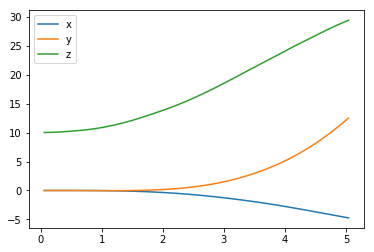

In [4]:

''' EVOLUÇÃO DA POSIÇÃO DO QUADRICÓPTERO '''

plt.plot( results[ 'time' ], results[ 'x' ], label='x' )
plt.plot( results[ 'time' ], results[ 'y' ], label='y' )
plt.plot( results[ 'time' ], results[ 'z' ], label='z' )
plt.legend()


The next code cell visualizes the velocity of the quadcopter.

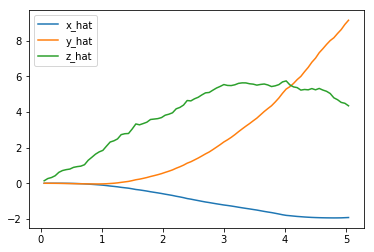

In [5]:

''' VELOCIDADE DO QUADRICÓPTERO '''

plt.plot( results[ 'time' ], results[ 'x_velocity' ], label='x_hat' )
plt.plot( results[ 'time' ], results[ 'y_velocity' ], label='y_hat' )
plt.plot( results[ 'time' ], results[ 'z_velocity' ], label='z_hat' )
plt.legend()


Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

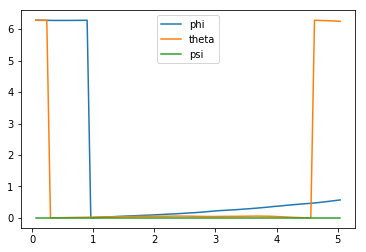

In [6]:

''' ROTAÇÃO DOS EIXOS DO QUADRICÓPTERO '''

plt.plot( results[ 'time' ], results[ 'phi'  ], label='phi'   )
plt.plot( results[ 'time' ], results[ 'theta'], label='theta' )
plt.plot( results[ 'time' ], results[ 'psi'  ], label='psi'   )
plt.legend()


before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

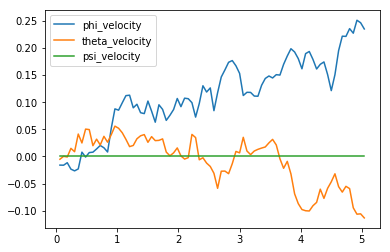

In [7]:

''' RADIANOS / SEGUNDO VS CADA ANGULO EULER DO QUADRICÓPTERO '''

plt.plot( results[ 'time' ], results[ 'phi_velocity'   ], label='phi_velocity'   )
plt.plot( results[ 'time' ], results[ 'theta_velocity' ], label='theta_velocity' )
plt.plot( results[ 'time' ], results[ 'psi_velocity'   ], label='psi_velocity'   )
plt.legend()


Finally, you can use the code cell below to print the agent's choice of actions.  

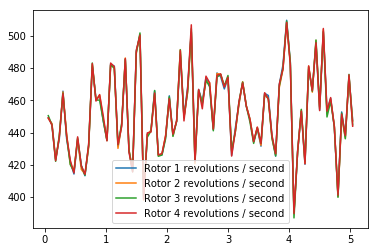

In [8]:

''' ESCOLHA DE AÇÕES DO AGENTE '''

plt.plot( results[ 'time'], results[ 'rotor_speed1' ], label='Rotor 1 revolutions / second' )
plt.plot( results[ 'time'], results[ 'rotor_speed2' ], label='Rotor 2 revolutions / second' )
plt.plot( results[ 'time'], results[ 'rotor_speed3' ], label='Rotor 3 revolutions / second' )
plt.plot( results[ 'time'], results[ 'rotor_speed4' ], label='Rotor 4 revolutions / second' )
plt.legend()


When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [9]:

''' ANÁLISE GERAL '''

print( task.sim.pose      )    # a posição do quadcopter nas dimensões    ( x, y, z )
print( task.sim.v         )    # a velocidade do quadcopter nas dimensões ( x, y, z )
print( task.sim.angular_v )    # velocidade angular ( radianos / segundo ) para cada um dos três ângulos de Euler


[-4.73305842 12.50443678 29.38063312  0.57177328  6.24830154  0.        ]
[-1.92389485  9.1523441   4.34834639]
[ 0.2351966  -0.11350575  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [10]:

num_episodes  =  1000
target_pos    =  np.array([ 0., 0., 10. ])
task          =  Task( target_pos=target_pos )
agent         =  PolicySearch_Agent( task ) 

# Inicia um Novo Episódio
for pI in range( 1, num_episodes + 1 ):
    state     =  agent.reset_episode()
    
    while True:
        action = agent.act( state ) 
        next_state, reward, done = task.step( action )
        agent.step( reward, done )
        state = next_state
        if done:
            # antes era \r ele sobrescreve o Print!
            print( "\nEpisode = {:4d}, score = {:7.3f} ( best = {:7.3f} ), noise_scale = {}".format( pI, agent.score, agent.best_score, agent.noise_scale), end="" )  # [debug]
            break
            
    sys.stdout.flush()  



Episode =    1, score = 59719.347 ( best = 59719.347 ), noise_scale = 0.05
Episode =    2, score = 58663.707 ( best = 59719.347 ), noise_scale = 0.1
Episode =    3, score = 61108.111 ( best = 61108.111 ), noise_scale = 0.05
Episode =    4, score = 61108.111 ( best = 61108.111 ), noise_scale = 0.1
Episode =    5, score = 61108.194 ( best = 61108.194 ), noise_scale = 0.05
Episode =    6, score = 62497.000 ( best = 62497.000 ), noise_scale = 0.025
Episode =    7, score = 62496.917 ( best = 62497.000 ), noise_scale = 0.05
Episode =    8, score = 57330.373 ( best = 62497.000 ), noise_scale = 0.1
Episode =    9, score = 57330.413 ( best = 62497.000 ), noise_scale = 0.2
Episode =   10, score = 58663.747 ( best = 62497.000 ), noise_scale = 0.4
Episode =   11, score = 58663.707 ( best = 62497.000 ), noise_scale = 0.8
Episode =   12, score = 61330.413 ( best = 62497.000 ), noise_scale = 1.6
Episode =   13, score = 57330.413 ( best = 62497.000 ), noise_scale = 3.2
Episode =   14, score = 58971.4

Episode =  221, score = 51385.931 ( best = 101188.048 ), noise_scale = 3.2
Episode =  222, score = 59417.290 ( best = 101188.048 ), noise_scale = 3.2
Episode =  223, score = 65214.391 ( best = 101188.048 ), noise_scale = 3.2
Episode =  224, score = 58330.417 ( best = 101188.048 ), noise_scale = 3.2
Episode =  225, score = 70663.707 ( best = 101188.048 ), noise_scale = 3.2
Episode =  226, score = 59997.040 ( best = 101188.048 ), noise_scale = 3.2
Episode =  227, score = 54163.542 ( best = 101188.048 ), noise_scale = 3.2
Episode =  228, score = 72460.899 ( best = 101188.048 ), noise_scale = 3.2
Episode =  229, score = 77330.693 ( best = 101188.048 ), noise_scale = 3.2
Episode =  230, score = 60866.478 ( best = 101188.048 ), noise_scale = 3.2
Episode =  231, score = 53568.286 ( best = 101188.048 ), noise_scale = 3.2
Episode =  232, score = 66663.884 ( best = 101188.048 ), noise_scale = 3.2
Episode =  233, score = 68113.072 ( best = 101188.048 ), noise_scale = 3.2
Episode =  234, score = 5

Episode =  439, score = 126434.678 ( best = 126434.678 ), noise_scale = 1.6
Episode =  440, score = 83330.515 ( best = 126434.678 ), noise_scale = 3.2
Episode =  441, score = 58330.458 ( best = 126434.678 ), noise_scale = 3.2
Episode =  442, score = 87997.400 ( best = 126434.678 ), noise_scale = 3.2
Episode =  443, score = 106407.872 ( best = 126434.678 ), noise_scale = 3.2
Episode =  444, score = 71425.524 ( best = 126434.678 ), noise_scale = 3.2
Episode =  445, score = 58971.513 ( best = 126434.678 ), noise_scale = 3.2
Episode =  446, score = 63330.433 ( best = 126434.678 ), noise_scale = 3.2
Episode =  447, score = 107404.963 ( best = 126434.678 ), noise_scale = 3.2
Episode =  448, score = 64099.756 ( best = 126434.678 ), noise_scale = 3.2
Episode =  449, score = 68052.806 ( best = 126434.678 ), noise_scale = 3.2
Episode =  450, score = 61330.893 ( best = 126434.678 ), noise_scale = 3.2
Episode =  451, score = 79707.493 ( best = 126434.678 ), noise_scale = 3.2
Episode =  452, score 

Episode =  657, score = 53330.373 ( best = 126434.678 ), noise_scale = 3.2
Episode =  658, score = 77008.943 ( best = 126434.678 ), noise_scale = 3.2
Episode =  659, score = 63886.222 ( best = 126434.678 ), noise_scale = 3.2
Episode =  660, score = 66663.744 ( best = 126434.678 ), noise_scale = 3.2
Episode =  661, score = 73681.263 ( best = 126434.678 ), noise_scale = 3.2
Episode =  662, score = 47219.181 ( best = 126434.678 ), noise_scale = 3.2
Episode =  663, score = 66663.762 ( best = 126434.678 ), noise_scale = 3.2
Episode =  664, score = 77269.909 ( best = 126434.678 ), noise_scale = 3.2
Episode =  665, score = 74442.011 ( best = 126434.678 ), noise_scale = 3.2
Episode =  666, score = 63633.318 ( best = 126434.678 ), noise_scale = 3.2
Episode =  667, score = 62663.747 ( best = 126434.678 ), noise_scale = 3.2
Episode =  668, score = 46373.768 ( best = 126434.678 ), noise_scale = 3.2
Episode =  669, score = 85330.813 ( best = 126434.678 ), noise_scale = 3.2
Episode =  670, score = 8

Episode =  875, score = 86360.909 ( best = 126434.678 ), noise_scale = 3.2
Episode =  876, score = 64099.718 ( best = 126434.678 ), noise_scale = 3.2
Episode =  877, score = 72410.793 ( best = 126434.678 ), noise_scale = 3.2
Episode =  878, score = 97433.359 ( best = 126434.678 ), noise_scale = 3.2
Episode =  879, score = 90802.115 ( best = 126434.678 ), noise_scale = 3.2
Episode =  880, score = 82606.087 ( best = 126434.678 ), noise_scale = 3.2
Episode =  881, score = 54163.667 ( best = 126434.678 ), noise_scale = 3.2
Episode =  882, score = 86417.420 ( best = 126434.678 ), noise_scale = 3.2
Episode =  883, score = 74997.200 ( best = 126434.678 ), noise_scale = 3.2
Episode =  884, score = 60212.086 ( best = 126434.678 ), noise_scale = 3.2
Episode =  885, score = 59417.420 ( best = 126434.678 ), noise_scale = 3.2
Episode =  886, score = 81156.855 ( best = 126434.678 ), noise_scale = 3.2
Episode =  887, score = 59520.381 ( best = 126434.678 ), noise_scale = 3.2
Episode =  888, score = 9

This agent should perform very poorly on this task.  And that's where you come in!

## Funções Desenvolvidas para o Projeto

In [353]:

def f_getDistance( x_tar, y_tar, z_tar, x_pos, y_pos, z_pos ):                
    """ Calcula a Distância entre DOIS Pontos, usando Geometria Analítica & Cálculo Vetorial """

    # calcula Hipotenusa entre os eixos X & Y
    cat_x    =   ( x_tar - x_pos  ) ** 2
    cat_y    =   ( y_tar - y_pos  ) ** 2          
    hip_xy   =   ( cat_x + cat_y  ) ** ( 1/2 )
    cat_xy   =     hip_xy ** 2

    # calcula Hipotenusa entre os eixos XY & Z
    cat_z    =   ( z_tar - z_pos  ) ** 2    
    hip_xyz  =   ( cat_xy + cat_z ) ** ( 1/2 )

    # retorna distância oriunda da Hipotenusa projetada nos eixos "X, Y & Z"
    hip_xyz  =    round( hip_xyz )
    return        hip_xyz  



def f_GetRegister( dist, dfInput ):
    """ Exibe registros de voo em que atingiu o objetivo """
    
    dfSuc    =  dfInput[ dfInput[ 'distancia' ] <=  dist ]
    dfSuc    =  dfSuc.sort_values( by=[ 'recompensa', 'pX', 'pY', 'pZ' ], ascending=False )
    total    =  len( dfSuc )
    
    print( '\033[94m \033[1mAMOSTRA | DISTÂNCIA DE ATÉ {} PONTOS DO ALVO DESEJADO.' .format( dist ))
    display( dfSuc.head( 5 ))
    
    print( '{:4d} : total de registro(s).\n\n\n\n' .format( total ))
    print( '' )



# função extraída de: https://stackoverflow.com/questions/3380726/converting-a-rgb-color-tuple-to-a-six-digit-code-in-python
def rgb2hex( r, g, b ):
    return "#{:02x}{:02x}{:02x}".format( int( round( r )), int( round( g )), int( round( b )))



def f_getColorDist( dist ):
    
    # Se a distância for igual ou menor que 15
    # então vermelho puro
    if dist <= 15:            
        cor =  rgb2hex( 255, 0, 0   )

    # Senão se a distância for maior que 15 e igual ou menor que 30
    # então faz a transição do rosa/roxo para o vermelho puro
    elif dist <= 30:            
        B   =  255 - (( 255 / ( 30 - 15 )) * ( 30 - dist )) 
        cor =  rgb2hex( 255, 0, B )

    # Senão se a distância for maior que 30 e igual ou menor que 60
    # então faz a transição do azul puro para rosa/roxo
    elif dist <= 60:
        R   =  (( 255 / ( 60 - 30 )) * ( 60 - dist ))
        cor =  rgb2hex(   R, 0, 255 )

    # Senão se a distância for maior que 60 e igual ou menor que 90
    # então faz a transição do azul escuro para azul puro    
    elif dist <= 90:
        B   =  255 - (( 255 - 120 ) / ( 90 - 60 )) * ( dist - 60 )
        cor =  rgb2hex(   0, 0, B )

    # Se a distância for maior que 90
    # então azul escuro
    else:            
        cor = rgb2hex(   0, 0, 120 )    
    
    
    # retorna a cor em tons degradê conforme a distâncIa
    return cor



def f_drawGraph3DSphere( lista, valor ):
    """ Desenha Gráfico 3D contendo as Esferas para cada Ponto do Treinamento em Questão """
    
    # configura o gráfico 3D
    fig  =  plt.figure( figsize = ( 18, 14 ))     
    ax   =  fig.add_subplot( 111, projection='3d' )
    
    # configura título, eixos e grade do gráfico
    ax.set_title(  'Geolozalicação de Voos Drone', fontsize=23, fontweight='bold' )
    ax.set_xlabel( 'Eixo X' , fontsize=17, fontweight='bold' )
    ax.set_ylabel( 'Eixo Y' , fontsize=17, fontweight='bold' )
    ax.set_zlabel( 'Eixo Z' , fontsize=17, fontweight='bold' )
    ax.axis( fontsize=13 )
    ax.grid( True )


    for pI in range( 0, nEpisodios ):
        
        dist  =  lista[ 'Distancia' ][ pI ]
        cor   =  f_getColorDist( dist )              
        
        # Se o drone estiver no chão E seu objetivo for diferente de estar no chão
        # então cor é neutra
        if ( lista['pZ'][ pI ] == 0 ) and (  lista['pZ'][ pI ] != valor ):
            ax.scatter( lista['pX'][ pI ], lista['pY'][ pI ], lista['pZ'][ pI ], color='black', marker='o' )

        # Senão cor é conforme a Zona ( Quente - OU - Fria )
        else:
            ax.scatter( lista['pX'][ pI ], lista['pY'][ pI ], lista['pZ'][ pI ], color=cor, marker='o' )


    # alterar a cor de fundo do gráfico
    ax = plt.gca()
    ax.set_facecolor( '#FFFD7B' )

    

def f_transformList( dist ):
    """ Função para Normalizar / Adequar Valores para Gráfico de Linhas """
    
    # a distância em questão é a diferença entre a localização do Drone E as coordenadas alvo
    # para gerar o gráfico de linhas de forma adequada as distâncias serão invertidas para que 
    # o gráfico não fique de ponta cabeça, ou seja, distâncias grandes ficarão próximas de "zero",
    # distâncias pequenas ficarão próximas de "mil".
    
    histLab2   =   [ 'Episodio', 'Distancia' ]
    histRes2   =   { x : [] for x in histLab } 
        
    # percorre a lista Original para Transformá-la
    for pI in range( 0, len( histRes[ 'Distancia' ] )):
        
        dist   =  histRes[ 'Distancia' ][ pI ]
        
        # para evitar  "infinito", quando a distância for zero ou estiver no limite ( tão próxima ) de zero
        if dist < 1:
            dist = 1
        
        # cálculo para invertar e escalar a grandez resultante
        valor  =  ( 1 / dist ) * 1000

        # adiciona dados aos registros históricos
        histRes2[ 'Episodio'   ].append( pI )
        histRes2[ 'Distancia' ].append( int( valor  ))
                
    return histRes2



def f_drawGraph2DRewards( lista ):
    """ Desenha Gráfico 2D contendo a correlação entre Recompensas Vs Episódios de Treinamento """
    
    # define o tamanho do gráfico
    plt.figure( figsize=( 20, 8 ))

    # Zona Quente é a Zona onde o Drone está próximo do Alvo
    # zonaQuente = 66
    # zonaFria   = 0    
    # traça uma linha na horizontal de fora a fora no gráfico
    # plt.axhline( y=zonaQuente,  color='black', linestyle='-')
    # plt.axhline( y=zonaQuente,  color='black', linestyle='-')    

    
    # cria série de dados
    plt.plot( lista[ 'Episodio' ], lista[ 'Distancia' ], label=None, color='black',  )
    
    
    # determina limites do gráfico
    plt.xlim( 0, 750 )      
    plt.ylim( 0, 300 )          
    
    
    # configura título, eixos e grade do gráfico
    ax = plt.gca()
    ax.set_title(  'Evolução do Aprendizado', fontsize=23, fontweight='bold' )
    ax.set_xlabel( 'Tentativas' , fontsize=15, fontweight='bold' )
    ax.set_ylabel( 'Recompensa' , fontsize=15, fontweight='bold' )
    ax.grid( True )    

    
    # cria degradês de fundo conforme a distância
    # tarja por tarja
    cor  =  f_getColorDist( 90 )    
    ax.axhspan( 0, 11,  facecolor = cor, alpha=0.75 )    
    
    for pDist in range( 4, 90 ):
        
        inf  =  ( 1 / ( pDist - 1 )) * 1000
        sup  =  ( 1 / ( pDist     )) * 1000
        cor  =  f_getColorDist( pDist )    
        ax.axhspan( inf, sup,  facecolor = cor, alpha=0.75 )
        
        

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [54]:

# Condições Iniciais do Quadricóptero
pXobj                   =   100.
pYobj                   =   100.
pZobj                   =   100.

nEpisodios              =   750                                         #  número de episódios de treinamento
target_pos              =   np.array([ pXobj, pYobj,   pZobj ])         #  posição final ( objetivo )

task                    =   Task( target_pos=target_pos )
agent                   =   DDPG( task )  

histLab                 =   [ 'Episodio', 'Recompensa', 'Distancia', 'pX', 'pY', 'pZ' ]
histRes                 =   { x : [] for x in histLab }


# atribui o tempo a variável
t0 = time()

# realiza treinamento
for pI in range( 1, nEpisodios + 1 ):
    
    # inicia um novo episódio
    state  =  agent.reset_episode()
    
    while True:        
        
        action = agent.act( state ) 
        next_state, reward, done = task.step( action  )
        agent.step( action, reward, next_state, done  )
        state   =   next_state                    
       
        # desmembra dados para construção de registros históricos / relatórios
        pX      =   round( task.sim.pose[ 0 ] )
        pY      =   round( task.sim.pose[ 1 ] )
        pZ      =   round( task.sim.pose[ 2 ] )   
        dist    =   f_getDistance( pXobj, pYobj, pZobj, pX, pY, pZ )
      
        if done:
            print( "\r Ep. = {:4d}, R. = {:7d} ( {:4d}, {:4d}, {:4d} )" .format( pI, int( reward ), int( pX ), int( pY ), int( pZ )  ) , end="" )
            break

    # adiciona dados aos registros históricos
    histRes[ 'Episodio'   ].append( pI )
    histRes[ 'Recompensa' ].append( int( reward  ))
    histRes[ 'Distancia'  ].append( dist  )
    histRes[ 'pX' ].append( pX  )
    histRes[ 'pY' ].append( pY  )            
    histRes[ 'pZ' ].append( pZ  )            
    sys.stdout.flush()          

# atribui o tempo a variável
t1 = time()

# exibe quanto tempo o algoritmo levou percorrer todos os episódios na amostra do treinamento
print( "\nTempo de Previsão: ", round( t1 - t0, 3 ), "s" )    


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
 Ep. =  750, R. =  268005 (   83,   96,  109 )0 )
Tempo de Previsão:  1629.344 s


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

 


-------------------------------------------------------------------------------------------
COORDENADAS QUE O DRONE DEVE ATINGIR: pX: 100.0, pY: 100.0, pZ: 100.0
-------------------------------------------------------------------------------------------



 AMOSTRA | GERAL.


,episodio,recompensa,distancia,pX,pY,pZ
1,2,26028,63.0,63.0,150.0,91.0
12,13,48674,46.0,93.0,145.0,109.0
18,19,47258,46.0,115.0,143.0,108.0
21,22,38446,51.0,150.0,92.0,103.0
24,25,26587,61.0,150.0,66.0,93.0


 750 : total de registro(s).




 AMOSTRA | TENTATIVA(S) NÃO LEVANTOU(RAM) VOO.


,episodio,recompensa,distancia,pX,pY,pZ
4,5,-100000000,101.0,111.0,109.0,0.0


   1 : total de registro(s).




 AMOSTRA | TENTATIVA(S) LEVANTOU(RAM) VOO.


,episodio,recompensa,distancia,pX,pY,pZ
0,1,24165,65.0,133.0,150.0,75.0
1,2,26028,63.0,63.0,150.0,91.0
2,3,12740,91.0,150.0,100.0,24.0
3,4,22316,69.0,150.0,118.0,56.0
5,6,15369,81.0,34.0,115.0,144.0


 749 : total de registro(s).




 AMOSTRA | TENTATIVA(S) AINTGIU(RAM) A ALTURA PRÓXIMA A DESEJADA.


,episodio,recompensa,distancia,pX,pY,pZ
1,2,26028,63.0,63.0,150.0,91.0
12,13,48674,46.0,93.0,145.0,109.0
18,19,47258,46.0,115.0,143.0,108.0
21,22,38446,51.0,150.0,92.0,103.0
24,25,26587,61.0,150.0,66.0,93.0


 516 : total de registro(s).




 AMOSTRA | DISTÂNCIA DE ATÉ 15 PONTOS DO ALVO DESEJADO.


,episodio,recompensa,distancia,pX,pY,pZ
424,425,6250000,4.0,102.0,96.0,100.0
74,75,6250000,4.0,100.0,96.0,102.0
336,337,6250000,4.0,100.0,96.0,102.0
31,32,6250000,4.0,99.0,96.0,101.0
245,246,5500000,5.0,101.0,96.0,102.0


 255 : total de registro(s).





 AMOSTRA | DISTÂNCIA DE ATÉ 10 PONTOS DO ALVO DESEJADO.


,episodio,recompensa,distancia,pX,pY,pZ
424,425,6250000,4.0,102.0,96.0,100.0
74,75,6250000,4.0,100.0,96.0,102.0
336,337,6250000,4.0,100.0,96.0,102.0
31,32,6250000,4.0,99.0,96.0,101.0
245,246,5500000,5.0,101.0,96.0,102.0


 167 : total de registro(s).





 AMOSTRA | DISTÂNCIA DE ATÉ 5 PONTOS DO ALVO DESEJADO.


,episodio,recompensa,distancia,pX,pY,pZ
424,425,6250000,4.0,102.0,96.0,100.0
74,75,6250000,4.0,100.0,96.0,102.0
336,337,6250000,4.0,100.0,96.0,102.0
31,32,6250000,4.0,99.0,96.0,101.0
245,246,5500000,5.0,101.0,96.0,102.0


  47 : total de registro(s).





 ESTATÍSTICAS GERAIS DO APRENDIZADO!


,episodio,recompensa,distancia,pX,pY,pZ
count,750.00000,7.500000e+02,750.00000,750.000000,750.000000,750.000000
mean,375.50000,6.037912e+05,27.53200,93.236000,96.297333,97.758667
std,216.65064,3.869375e+06,21.43057,28.218469,6.473185,17.827812
min,1.00000,-1.000000e+08,4.00000,-150.000000,18.000000,0.000000
25%,188.25000,6.691400e+04,11.00000,75.000000,96.000000,91.000000
50%,375.50000,1.864645e+05,23.00000,96.500000,96.000000,103.000000
75%,562.75000,8.154458e+05,39.00000,115.000000,96.000000,108.000000
max,750.00000,6.250000e+06,324.00000,150.000000,150.000000,300.000000


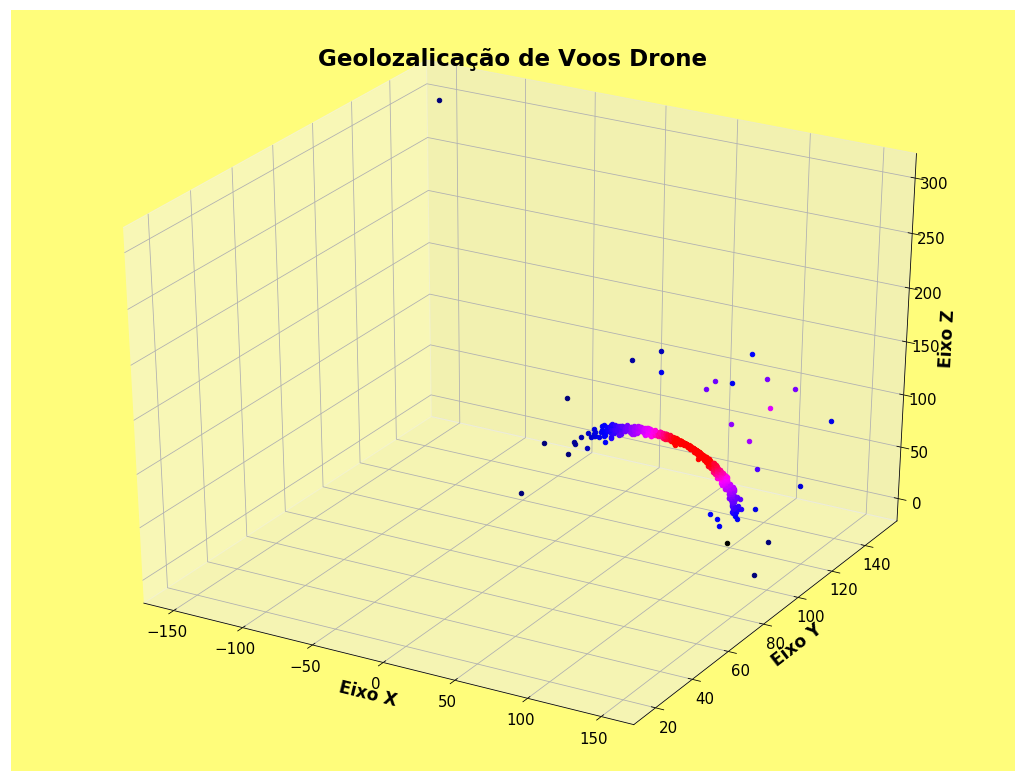

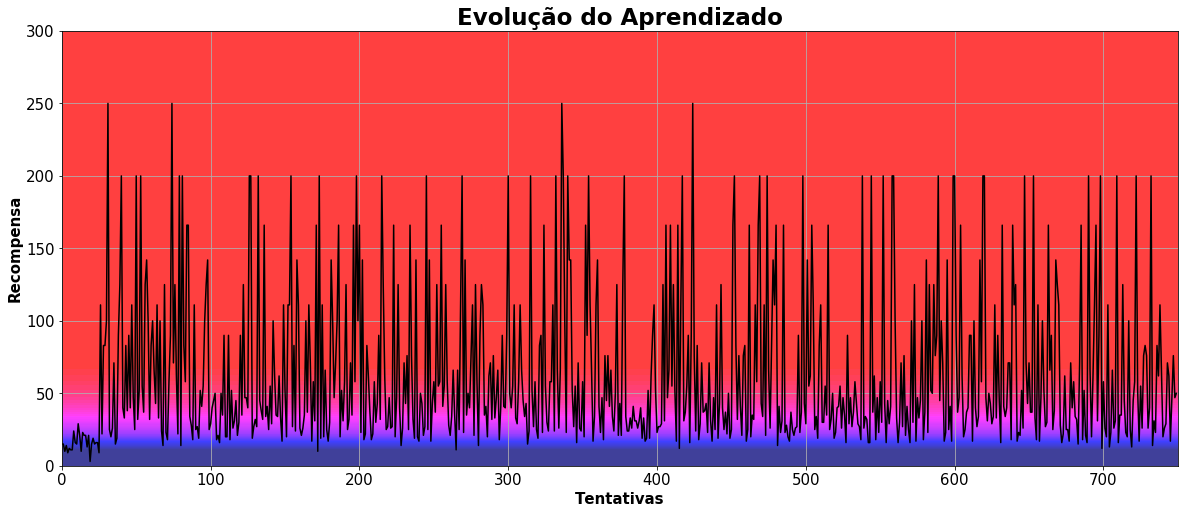

In [354]:

# cria um DataFrame, especificando nome das colunas
dfHis = pd.DataFrame( {   'episodio'   :  histRes[ 'Episodio'   ], 
                          'recompensa' :  histRes[ 'Recompensa' ], 
                          'distancia'  :  histRes[ 'Distancia'  ], 
                          'pX'         :  histRes[ 'pX' ],
                          'pY'         :  histRes[ 'pY' ],
                          'pZ'         :  histRes[ 'pZ' ]       })   

# salva dataFrame 
dfHis.to_csv( 'treinamento.txt' )


""" Códigos Mudar Cores do Print
PURPLE      =  '\033[95m'
CYAN        =  '\033[96m'
DARKCYAN    =  '\033[36m'
BLUE        =  '\033[94m'
GREEN       =  '\033[92m'
YELLOW      =  '\033[93m'
RED         =  '\033[91m'
BOLD        =  '\033[1m'
UNDERLINE   =  '\033[4m'
END         =  '\033[0m'
"""


print( '\033[1m \033[91m\n\n' )
print( '-------------------------------------------------------------------------------------------' )
print( 'COORDENADAS QUE O DRONE DEVE ATINGIR: pX: {}, pY: {}, pZ: {}'  .format( pXobj, pYobj, pZobj ))
print( '-------------------------------------------------------------------------------------------' )
print( '\n\n\033[0m'  )


print( '\033[94m \033[1mAMOSTRA | GERAL.')
display( dfObj.head( 5 ))
print( '{:4d} : total de registro(s).\n\n\n\n' .format( len( dfHis )))



dfObj = dfHis[ dfHis[ 'pZ' ] <    1 ]
print( '\033[94m \033[1mAMOSTRA | TENTATIVA(S) NÃO LEVANTOU(RAM) VOO.')
display( dfObj.head( 5 ))
print( '{:4d} : total de registro(s).\n\n\n\n' .format( len( dfObj )))



dfObj = dfHis[ dfHis[ 'pZ' ] >    0 ]
print( '\033[94m \033[1mAMOSTRA | TENTATIVA(S) LEVANTOU(RAM) VOO.')
display( dfObj.head( 5 ))
print( '{:4d} : total de registro(s).\n\n\n\n' .format( len( dfObj )))



dfObj = dfHis[ dfHis[ 'pZ' ] >=  90 ]
dfObj = dfObj[ dfObj[ 'pZ' ] <= 110 ]
print( '\033[94m \033[1mAMOSTRA | TENTATIVA(S) AINTGIU(RAM) A ALTURA PRÓXIMA A DESEJADA.')
display( dfObj.head( 5 ))
print( '{:4d} : total de registro(s).\n\n\n\n' .format( len( dfObj )))


f_GetRegister( 15, dfHis )
f_GetRegister( 10, dfHis )
f_GetRegister(  5, dfHis )


print( '\033[94m \033[1mESTATÍSTICAS GERAIS DO APRENDIZADO!' )
display( dfHis.describe( ))


f_drawGraph3DSphere( histRes, pZobj )


histRes2 = f_transformList( histRes )
f_drawGraph2DRewards( histRes2 )



## Função Recompensa Implementada no Código Fonte

In [ ]:

import numpy as np
from physics_sim import PhysicsSim


class Task():
    
    """Task (environment) that defines the goal and provides feedback to the agent."""
    def __init__( self, init_pose=None, init_velocities=None, init_angle_velocities=None, runtime=5., target_pos=None ):
        """Initialize a Task object.
        Params
        ======
            init_pose: initial position of the quadcopter in (x,y,z) dimensions and the Euler angles
            init_velocities: initial velocity of the quadcopter in (x,y,z) dimensions
            init_angle_velocities: initial radians/second for each of the three Euler angles
            runtime: time limit for each episode
            target_pos: target/goal (x,y,z) position for the agent
        """
         
    
       # Se a posição B ( alvo ) não for especificada, então assume uma posição padrão
        if target_pos is None:
            target_pos =  np.array([ 0., 0., 100. ]) 
            
            
        # Isola Coordenadas do Local a se deslocar
        x_tar     =   round( np.around( target_pos[ 0 ], decimals=0 ))
        y_tar     =   round( np.around( target_pos[ 1 ], decimals=0 ))
        z_tar     =   round( np.around( target_pos[ 2 ], decimals=0 ))
        
        
        # Se a posição A ( inicial ) não for especificada, então assume uma posição padrão
        if init_pose is None:
            init_pose = np.array([ 0.,  0.,  0.,  0.,  0.,  0. ])
        
        
        # Se a velocidade inicial não for especificada, então o drone direciona a velocidade de cada um dos eixos
        # X, Y & Z para as coordenadas a se deslocar
        if init_velocities is None:
            init_velocities = np.array([ x_tar * 0.7, y_tar * 0.7, z_tar * 0.7 ])
                
            
        # Se a posição A ( inicial ) não for especificada, então assume uma posição padrão
        if init_angle_velocities is None:
            init_angle_velocities = np.array([ 0.,  0.,  0. ])
            
                
        # Valores Padrão
        self.sim            =  PhysicsSim( init_pose, init_velocities, init_angle_velocities, runtime ) 
        self.action_repeat  =  3
        self.action_size    =  4
        self.action_low     =  0
        self.action_high    =  900
        self.state_size     =  self.action_repeat * 6
        self.target_pos     =  target_pos
        
        
        
    def get_distance( self, x_tar, y_tar, z_tar, x_pos, y_pos, z_pos ):                        
        """ Calcula a Distância entre DOIS Pontos, usando Geometria Analítica & Cálculo Vetorial """

        # calcula Hipotenusa entre os eixos X & Y
        cat_x    =   ( x_tar - x_pos  ) ** 2
        cat_y    =   ( y_tar - y_pos  ) ** 2          
        hip_xy   =   ( cat_x + cat_y  ) ** ( 1/2 )
        cat_xy   =     hip_xy ** 2

        # calcula Hipotenusa entre os eixos XY & Z
        cat_z    =   ( z_tar - z_pos  ) ** 2    
        hip_xyz  =   ( cat_xy + cat_z ) ** ( 1/2 )

        # retorna distância oriunda da Hipotenusa projetada nos eixos "X, Y & Z"
        hip_xyz  =    round( hip_xyz )
        return        hip_xyz  
        
        
        
    def get_reward( self ):               
        # Separa Valores dos Eixos Atuais
        x_pos     =   round( np.around( self.sim.pose[ 0 ],   decimals=0 ))
        y_pos     =   round( np.around( self.sim.pose[ 1 ],   decimals=0 ))
        z_pos     =   round( np.around( self.sim.pose[ 2 ],   decimals=0 ))
                
        # Separa Valores dos Eixos Desejados
        x_tar     =   round( np.around( self.target_pos[ 0 ], decimals=0 ))
        y_tar     =   round( np.around( self.target_pos[ 1 ], decimals=0 ))
        z_tar     =   round( np.around( self.target_pos[ 2 ], decimals=0 ))
          
        
        # se estiver no chão e o chão não for o objetivo, penaliza o agente
        if (( z_tar != 0 ) and ( z_pos < 1 )):
            reward   =  - 100000000
        else:
                        
            # recompensa da distância do ponto "A" Vs ponto "B"
            dist_pB  =    self.get_distance( x_tar, y_tar, z_tar, x_pos, y_pos, z_pos )
                        
            # realiza ajuste caso esteja no ponto exato
            if dist_pB < 2:
                reward = 30000000
                
            else:                
                reward = ((( 1 / dist_pB ) * 10000 ) ** 2 )
                                     
                    
        # divide por 3, em função de "self.action_repeat", desta forma as recompensas
        # seguem a estrutura planejada
        reward = reward / 3
        return reward


## Reflexões

**Perg. 1: Descreva a tarefa que você especificou em `task.py`. Como você projetou a função de recompensa?**

**Resp.:** Dentre as 04 tarefas possíveis: 
- a ) takeoff ( decolar );
- b ) hover in place ( pairar no lugar );
- c ) land softly ( pousar suavemente );
- d ) reach a target pose ( alcançar um alvo );

Escolhi a tarefa "d"! Importante ressaltar que esta tarefa envolve "a" e "b" simultanemente, uma vez que o objetivo é sair de um dado ponto "A" em um espaço e se deslocar até o ponto "B". Essa tarefa é altamente complexa, em virtude de o algoritmo ter  característica Exploratória ( buscar explorar o ambiente afim de conhecer as recompensas e mapear as possíveis políticas ).


A Função Recompensa foi projetada levando em consideração as seguintes premissas:

- O cálculo baseia-se na distância entre o pontos Origem vs Destino, ou seja, usando projeções do teorema de pitágoras em um espaço tridimensional ( isso pode ser observado em qualquer literatura científica de Geometria Analítica e Cálculo Vetorial );


- Logo após, divido 1 pela distância encontrada. Desta forma faço com que distâncias grandes sejam penalizadas, enquanto que distâncias pequenas sejam recompensadas. Quando a distância for menor que 2, atribuo a recompensa mais alta possível, uma vez que é indefinido a divisão de 1 por 0. Quanto menor a distância, maior se tornar o crescimento da função, assumindo comportamento exponencial;


- Depois multiplico o resultado por 10.000, afim de transformar todos os valores inferiores a 1, em valores consideráveis a interpretação humana e claro, a sensibilidade do drone pela recompensa, ou seja, os valores deixam de ser decimais e se tornam "grandezas inteiras" ( observe no gráfico abaixo esse comportamento );


- Por fim, o valor é elevado ao quadrado, para atenuar a sensibilidade do drone às recompensas Vs as distâncias à medida em que é treinado, desta forma o Drone cria uma "percepção" de aproximação das coordenadas de Destino;


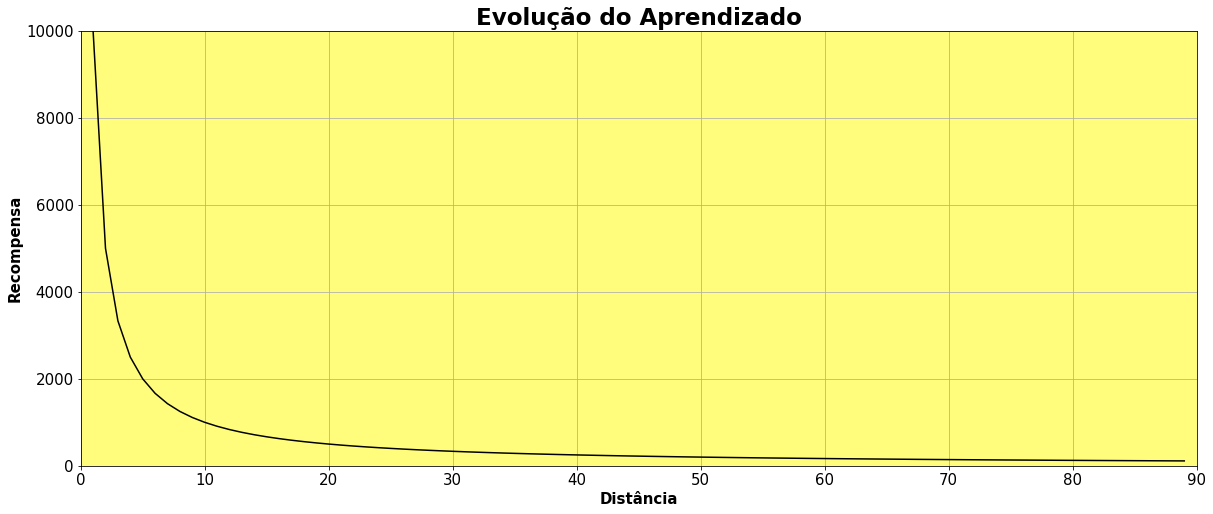

In [359]:

recompensa = []
distancia  = []


for pI in range( 1, 90 ):
    
    distancia.append( pI )
    
    # O Valor não é elevado ao quadrado aqui, afim de melhorar a legibilidade do gráfico
    # mas na função de recompensa implementada ele foi elevado ao quadrado!
    valor = ( 1 / pI ) * 10000
    recompensa.append( valor )


# define o tamanho do gráfico
plt.figure( figsize=( 20, 8 ))


# cria série de dados
plt.plot( distancia, recompensa, label=None, color='black',  )


# determina limites do gráfico
plt.xlim( 0,    90 )
plt.ylim( 0, 10000 )          


# configura título, eixos e grade do gráfico
ax = plt.gca()
ax.set_title(  'Evolução do Aprendizado', fontsize=23, fontweight='bold' )
ax.set_xlabel( 'Distância'  , fontsize=15, fontweight='bold' )
ax.set_ylabel( 'Recompensa' , fontsize=15, fontweight='bold' )
ax.grid( True )    


# alterar a cor de fundo do gráfico
ax = plt.gca()
ax.set_facecolor( '#FFFD7B' )
    
    


**Perg. 2: Discuta seu agente brevemente, usando as seguintes perguntas como um guia:**

2.1 - Qual(is) algoritmo(s) de aprendizado você tentou? O que funcionou melhor para você?

2.2 - Qual foi a sua escolha final de hiperparâmetros (como alpha, gamma, epsilon, etc.)?

2.3 - Qual arquitetura de rede neural você usou (se houver)? Especifique camadas, tamanhos, funções de ativação, etc.

**Resp.:**

2.1 - Usei somente o algoritmo DDPG ( em inglês "Deep Deterministic Policy Gradient", em português Política Gradiente Determinística Profunda ). Escolhi esse agoritmos em função de ser: Métodos baseados em política que buscam obter diretamente a política ótima, sem necessariamente conhecer a função de valor ideal. Possuem várias vantagens sobre métodos baseados em valor:
- Mapeiam diretamente de estados para ações, com isso não é preciso lidar com funções de valor.
- Podem ser empregados em espaços contínuos ( números reais ) e em espaços discretos ( números inteiros ).
- Representam a escolha das ações como uma distribuição de probabilidades, obtendo políticas estocásticas ao final.

O algoritmo em si atendeu bem a questão, uma vez que implementei uma função de recompensa de acordo com o contexto desejado ( tarefa a que me propus a fazer ).


2.2 - Nenhum dos hiperparâmetros foi alterado. Optou-se por manter seus valores default nesta questão.
- Taxa de Aprendizado, letra grega α, lê-se "alpha" = 0.2
- Taxa de Desconto, letra grega γ, lê-se "gamma" = 0.99
- Taxa de Explotação, letra grega ϵ, lê-se "Epsilon" = 0.01

A função de recompensa implementada atendeu a questão, sendo suficientemente bom ao contexto de aprendizado e elucidativa para o agente compreender o objetivo, com 750 episódios o agente foi capaz de aprender a se deslocar do ponto de origem até o ponto de destino.


2.3 - Não implementei Rede Neural. Um detalhe APENAS por curiosidade, Redes Neurais necessitam que os valores sejam normalizados para atender aos critérios de entrada, processamento e saída. No meu caso, DDPG optei por arredondar as coordenadas decimais, transformando-as em inteiros, como uma forma de digamos "boa prática" ( neste caso ) e usual para atender aos critérios de entrada, processamento e saída em meu algoritmo. 


**Perg. 3: Usando o enredo de recompensas do episódio, discuta como o agente aprendeu ao longo do tempo.**

3.1 - Foi uma tarefa fácil de aprender ou difícil?
3.2 - Houve uma curva de aprendizado gradual ou um momento de aha?
3.3 - Quão bom foi o desempenho final do agente? (por exemplo, recompensas médias nos últimos 10 episódios)

**Resp.:**

3.1 - Foi uma tarefa difícil! São 3 eixos (x, y e z), se considerarmos de 0 a 100 espaços, estamos falando em ( 100 ) ³, ou mais precisamente de ( 200 )³, quando lembramos que os eixos podem ter distâncias em sentidos contrários ( positivos ou negativos ), possibilidades a serem analisadas, isso limitando-se a espaços discretos, sem levar em consideração a possibilidade de o espaço se extender ( rumo ao infinito ) ou de ser "quebrado" em porções menores ( números decimais ). A maioria das pessoas escolhe a tarefa take off ( levantar voo ); como observado nas análises estatísticas e plotagem da função recompensa o drone levantou voo em 749 tentativas de 750 tentativas ( somente 1 permaneceu no chão ). 
- Em 255 tentativas ele atingiu a distância de 15 pontos das coordenadas de destino;
- Em 167 tentativas ele atingiu a distância de 10 pontos das coordenadas de destino; 
- Em 047 tentativas ele atingiu a distância de 05 pontos das coordenadas de destino;


3.2 - Após ter implementado a função de recompensa e ter feito ajustes na inicilização do drone, o agente foi capaz de se direcionar ao ponto de destino e com isso aprender. Como observado em gráficos ( 3D e 2D ) e no histórico de registros das tabelas, as regiões quentes ( marcadas em vermelho, rosa e roxo ) são a aproximação do drone para com seu destino. enquanto as regiões frias ( azul natural e azul escuro ) são o distanciamento do drone. O Drone ficou limitado as zonas quentes, uma vez que ele se direcionou a elas, ou seja, quanto mais próximo do destino, maiores as recompensas de forma exponencial, mais viciado a essas regiões ele fica. Em suma ele aprendeu gradualmente a atingir o destino, uma vez que o algoritmo tem a característica exploratória do ambiente.


3.3 - A recompensa média dos últimos 10 episódios foi de: 241149,3 ( o que resulta em uma distância média de 20 pontos da coordenada de destino, se fizer a engenharia reversa na fórmula que desenvolvi ). Se observar na tabela abaixo, notará que 03 tentativas de 10 ficaram em 13, 14 e 16, o que resulta uma média de 14,3 pontos das coordenadas de destino, ou seja muito próximo ao alvo.


In [371]:

# média da recompensa dos últimos 10 episódios de treinamento
print( 'média: {}' .format( dfHis['recompensa'].tail( 10 ).mean()))

# últimos 10 episódios de treinamento
display( dfHis.tail( 10 ))


média: 241149.3


,episodio,recompensa,distancia,pX,pY,pZ
740,741,44024,48.0,129.0,96.0,62.0
741,742,69252,38.0,129.0,96.0,75.0
742,743,88279,34.0,125.0,96.0,78.0
743,744,510204,14.0,89.0,96.0,108.0
744,745,408564,16.0,87.0,96.0,108.0
745,746,32277,56.0,44.0,96.0,104.0
746,747,226757,21.0,82.0,96.0,109.0
747,748,537374,13.0,111.0,96.0,94.0
748,749,226757,21.0,82.0,96.0,110.0
749,750,268005,20.0,83.0,96.0,109.0


**Perg. 4: Resuma brevemente sua experiência de trabalho neste projeto. Você pode usar os seguintes prompts para ideias.**

4.1 - Qual foi a parte mais difícil do projeto? (por exemplo, começar, plotar, especificar a tarefa, etc.)
4.2 - Você achou alguma coisa interessante em como o quadricóptero ou seu agente se comportou?

**Resp.:**


## Breve Resumo 


Eu não vou resumir nada brevemente não... Levei dias pra fazer esse trem, vou contar tim tim por tim tim agora. srsrs.

Escrevi a função recompensa acreditando que a solução fosse usar Geometria Analítica e Cálculo Vetorial, mas após inúmeras tentativas o drone não se aproximava do destino. Depois mudei a função recompensa usando a ideia de exponencial, mas mesmo assim não se aproximava. Por fim optei por usar a ideia de "Zonas Quentes", pensei na Crosta Terrestre, que é dividida em camadas e a medida em que nos "aproximamos" do núcleo a temperatura aumenta. Então o que fiz foi tornar o calor a recompensa e a aproximação do núcleo ( distância - geometria analítica e cálculo vetorial ) a recompensa. Mesmo assim o drone não funcionava. Cheguei a pesquisar equações sobre esfera, corda, arco, área, volume e distâncias para cogitar erros e possíveis projeções também.

Trabalhei neste projeto por 17 dias, um total de mais de 30 horas sem sombra de dúvidas, de manhã, de tarde, de noite e até de madrugada. Fiz testes com 500, 1.000, 1.500, 2.000, 2.500, 3.000, 3.500, 4.000, 4.500, 5.000, 7.000, 10.000, 30.000 e até mesmo 50.000 episódios. O processador do meu notebook rodou tanto, mas tanto, mas tanto, que só faltou meu notebook virar um drone e sair voando pela casa srs. 

Após inúmeras tentativas o drone fracassou, ele nem de longe se aproximava do destino. Parecia uma BARATA TONTA voando, quase dei uma chinelada no meu notebook de raiva. Com muito custo e análise comecei a refletir e a rever a função recompensa. Foi quando comecei a juntar as estratégias todas que criei em uma só ( geometria analítica e cálculo vetorial para distância + inversão de grandezas + escalar para sensibilidade + exponencial ) tudo para criar a ideia de "batata quente" e de "aproximação" das coordenadas do destino. 

Apesar de tudo isso e de rodar novamente o drone incontáveis vezes ele falhava, apresentou uma sútil melhora, mas NUNCA se aproximava do destino, ficando sempre a mais de 100 pontos de distância do destino e com uma média geral de 70 pontos. Foi quando tive a ideia, ao iniciar, o drone setar automaticamente a velocidade inicial dos motores para um valor próximo das coordenadas de destino, isso funcionaria como um IMPULSO que ele daria, esse processo de setagem seria a ideia de uma BÚSSOLA apontando para determinada direção.

Eureca! Era isso que estava faltando para meu a Inteligência Artificial ser capaz de mapear melhor o ambiente se aproximando do objetivo: um senso de direção, uma dica, um palpite, uma ideia inicial de propulsão. Rodei novamente e para minha surpresa o drone melhorou exponencialmente a aprendizagem, com 500 episódios máximo 2.000 episódios ele já é capaz de aprender a atingir as coordenadas de destino, ou seja "reach target pose". Percebi que minha linha de raciocínio não estava errada, o que estava errado era a ausência de dar uma dica para o drone aonde se dirigir.

Fiquei tanto tempo preso na ideia de dar "recompensas" ao drone que esqueci as demais configurações dele. O que estava debaixo do meu nariz. Aprendi bastante com isso. 



## Aprendizados Gerais Referente à Teoria


Aprendizado por Reforço recebe esse nome em virtude de ser um algoritmo que busca aprender com base na tentativa e erro, aprendendo de forma "cega" a lidar e interagir com o ambiente. Ou seja, suas taxas de erro inicialmente são altas, a medida em que o tempo passa o algoritmo se aprimora, conhece maiores detalhes sobre o ambiente e se familiariza com ele, podendo vir a ter margens de erros menores. São algoritmos que tendem a ser "gulosos" buscando a maior recompensa possível, em analogia seriam como zumbis ( esfomeados e sem sentimento ou consciência alguma dos fatos ).

Dois problemas surgem no Aprendizado por Reforço, os quais devem ser analisados criteriosamente para todo e qualquer algoritmo, em especial quando submetidos a ambientes ou regras complexas:

1 - O algoritmo às vezes fica "viciado" em estratégias atuais para obter sempre a mesma recompensa, isso faz com que não "explorem" o ambiente o qual estão situados e algumas das vezes não possam formular estratégias novas de aprendizado / ganho de recompensa. Isso é tido como "mínimos locais", ficando presos, condicionados a determinados comportamentos, em razão da frágil sensibilidade a recompensas;

2 - O algoritmo às vezes atingi excelentes recompensas mas seu desejo por recompensas os leva a explorarem melhor o ambiente em questão, assumindo por vezes estratégias ruins, às vezes péssimas. Isso não significa que o algoritmo não aprendeu o que deveria aprender, mas sim, significa que ele é "cego" para com o objetivo real e está a mapear o ambiente em questão;



## Aprendizados Gerais Referente à Prática


A tarefa em si  "reach target pose" é mais complexa do que achava, há momentos em que o drone "atinge" regiões muito próximas ao alvo, há momentos em que não, o espaço é aberto, isso torna a assimilação do agente as recompensas "difusas" ( confusas, esparsas, perdidas ). Se crio regras simples o agente se limita a passos pequenos com medo de ir adiante, se crio regras complexas o agente exagera nos passos ( parece um bêbado ). Se não concedo ao agente um senso de direção ele parece um EDEOTA ( levaria uma eternidade para aprender algo, se é que aprenderia ).

Quão mais "livre" ou "opções" uma gente tem para atuar sobre o ambiente, maior se torna a curva de aprendizado dele, por conta da característica exploratória, ele fica tentando "mapear" momento após momento, de forma cega ( inconsciente )! Isso implica em um aprendizado duvidoso, esparso e indefinido caso as regras, funções e/ou configurações não estiverem bem projetadas.

O projeto me lembrou de longe o carro do Google, que tem inúmeras regras, como pedestre, sinais, intempéreis, condições climáticas gerais, ruas e afins, o que dificultam o aprendizado da Inteligência Artificial ( combina uma série de mecanismos entre eles Aprendizado por Reforço e o Google está há anos aprimorando / treinando para fins comerciais ). No caso do drone especificamente o espaço é aberto, não há obstáculos ou maiores regras como objetos a serem evitados, há somente o espaço aberto. Todavia esse espaço é composto por 3 eixos ( x, y e z ) o que aumenta e muito a complexidade de aprendizado do sistema.

Outra coisa que observei é que quanto mais critérios estabelecemos para um agente operar ( estados, ações, regras ), mais difuso e confuso se torna seu aprendizado. A ausência de uma "Consciência" fazem os agentes ser tolos e limitados ao contexto em que estão inseridos. Não passam de meros "bonecos de cordas". Por essa razão eles não conseguem enxergar necessariamente o "todo" e dicernir múltiplas condições conseguintes ( tal como uma Árvore de Decisão faz ao combinar diferentes critérios por exemplo ). É um aprendizado que explora o ambiente o qual está inserido, busca mapear ações, estados e recompensas dentre a realidade a qual foi projetado para trabalhar, operar e demonstrar performances mais próximas possíveis da perfeição. Todavia o agente é "cego" e limitado a ver o que somente está a ver ( tal como um Burro / Cavalo tem sua visão limitada a olhar somente para frente, mas não para os lados ).



## Conclusão

A maioria das pessoas projetam o Quadricóptero para apenas "levantar vôo", quis projetá-lo para "atingir um determinado destino", para isso estabeleci uma tolerância de até 15 pontos quanto as coordenadas de destino, estabeleci a ideia de zonas ( regiões ) para forçar o melhor entendimento do agente sobre o espaço e permitir seu aprendizado de forma "sútil" e mais "fácil", sobretudo ajustei as configurações do drone para dar um empurrão inicial em direção ao destino, desta forma reduzindo exponencialmente a curva de aprendizado de "levaria a eternidade" para "leva alguns poucos minutos".

Todo o aprendizado no projeto me fez refletir bastante e refinar ideias paralelas sobre Consciência Artificial e como a ausência dela faz com que uma Inteligência Artificial seja limitada as condições impostas por nós, como configurações ou falta de direção, ou como ela busca explorar o ambiente por si só ( usando recompensas / punições ).

Gostei muito de projetar o algoritmo sem usar outros artifícios ( algoritmos ou configurações extras ), uma vez que isso me permitiu conhecer melhor as limitações e trabalhar a matemática por trás nessas questões.
